In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
from torch.nn.functional import relu
from scipy.io import loadmat
import os
from os import listdir
import pandas as pd
from skimage import io
from PIL import Image
from sklearn.metrics import confusion_matrix
import seaborn as sn

from utils import *

In [2]:
model_saving_path =  '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_5sWindow'
timewindow = 5

In [3]:

train_loader, val_loader, test_loader = create_dataloaders(batch_size=128, version='_Goose_5sW')#, upsample=True)

In [4]:
len(train_loader), len(val_loader), len(test_loader)

(111, 4, 30)

In [5]:
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader): # check shapes
    print(data.shape)
    print(label.shape)
    print(len(date))
    print(len(rec))
    print(len(time))
    break

torch.Size([128, 62, 100, 5])
torch.Size([128, 1])
128
128
128


date:180327, rec:006, time:5390.0


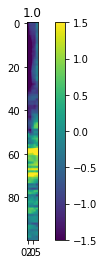

date:180327, rec:008, time:337.0


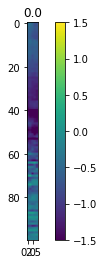

date:180326, rec:003, time:4678.0


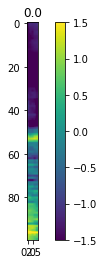

date:180323, rec:001, time:3993.0


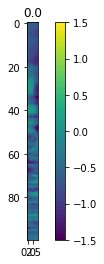

date:180322, rec:007, time:4972.0


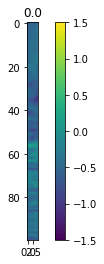

date:180325, rec:007, time:4680.0


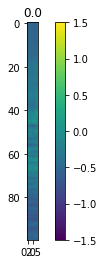

date:180411, rec:007, time:1665.0


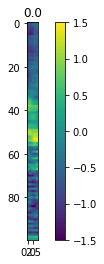

date:180322, rec:007, time:3466.0


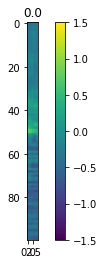

date:180323, rec:007, time:5398.0


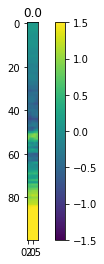

date:180324, rec:008, time:2635.0


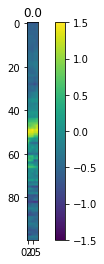

date:180413, rec:001, time:4654.0


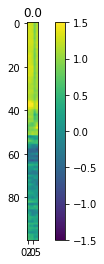

date:180327, rec:005, time:5745.0


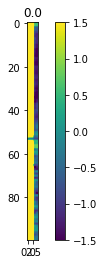

date:180325, rec:007, time:4860.0


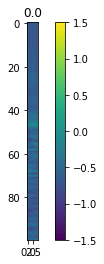

date:180327, rec:005, time:1925.0


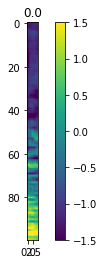

date:180323, rec:001, time:1327.0


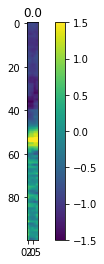

date:180327, rec:008, time:2209.0


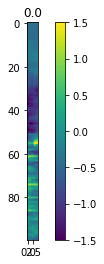

date:180325, rec:009, time:5569.0


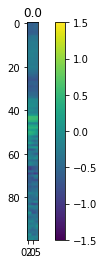

date:180413, rec:001, time:3625.0


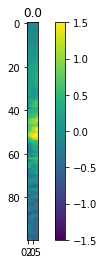

date:180325, rec:007, time:5600.0


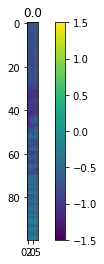

date:180327, rec:008, time:4295.0


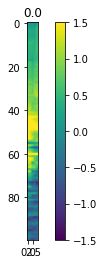

date:180325, rec:009, time:5021.0


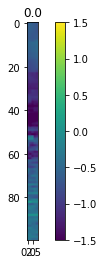

date:180409, rec:006, time:6945.0


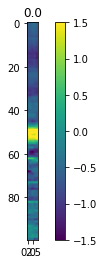

date:180327, rec:001, time:917.0


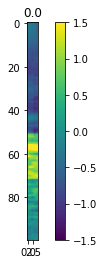

date:180324, rec:008, time:2535.0


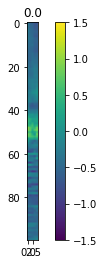

date:180325, rec:009, time:7170.0


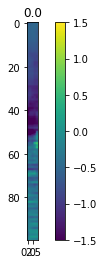

date:180327, rec:008, time:2709.0


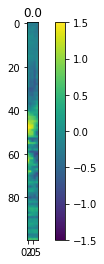

date:180322, rec:007, time:4822.0


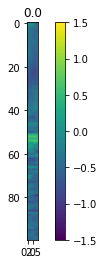

date:180324, rec:008, time:1908.0


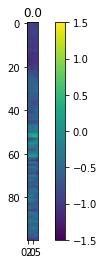

date:180323, rec:007, time:4368.0


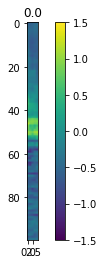

date:180327, rec:008, time:2269.0


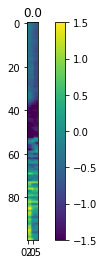

date:180412, rec:001, time:1325.0


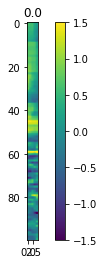

date:180324, rec:008, time:2815.0


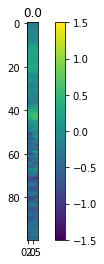

date:180411, rec:006, time:3725.0


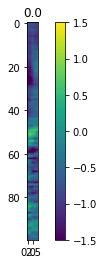

date:180325, rec:009, time:5016.0


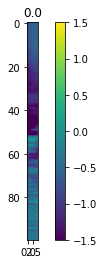

date:180413, rec:001, time:4799.0


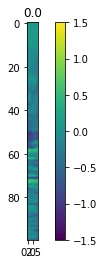

date:180327, rec:008, time:3494.0


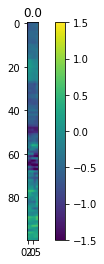

date:180325, rec:001, time:2307.0


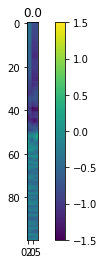

date:180327, rec:004, time:2241.0


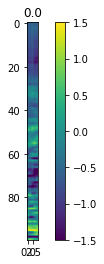

date:180325, rec:001, time:1537.0


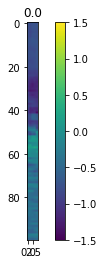

date:180325, rec:001, time:1327.0


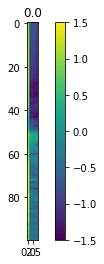

date:180414, rec:007, time:4455.0


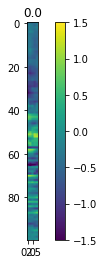

date:180323, rec:001, time:102.0


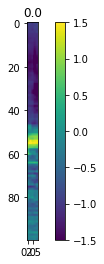

date:180325, rec:009, time:2117.0


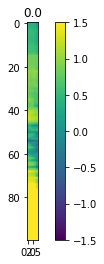

date:180414, rec:007, time:5345.0


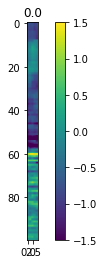

date:180322, rec:007, time:1744.0


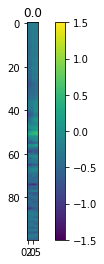

date:180327, rec:007, time:6383.0


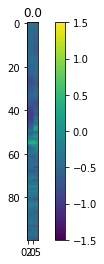

date:180327, rec:002, time:1073.0


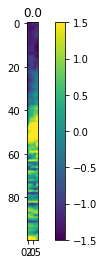

date:180411, rec:006, time:3225.0


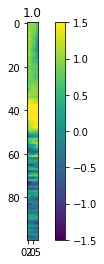

date:180325, rec:009, time:1347.0


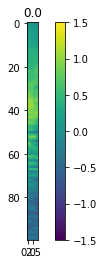

date:180411, rec:007, time:842.0


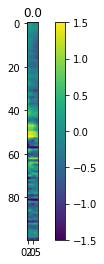

date:180411, rec:007, time:627.0


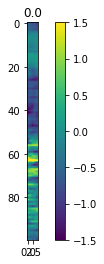

date:180325, rec:005, time:7.0


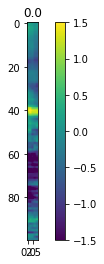

date:180324, rec:008, time:5181.0


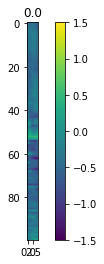

date:180323, rec:007, time:2361.0


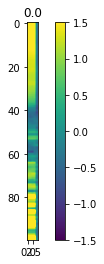

date:180413, rec:002, time:5678.0


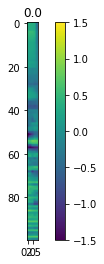

date:180327, rec:007, time:6738.0


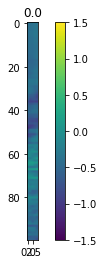

date:180327, rec:007, time:5163.0


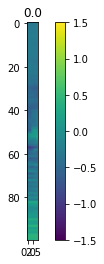

date:180325, rec:001, time:1342.0


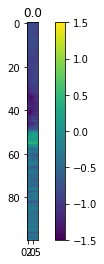

date:180413, rec:001, time:3820.0


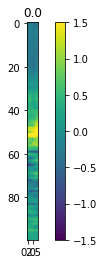

date:180327, rec:001, time:1742.0


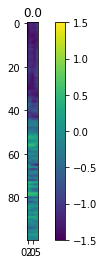

date:180327, rec:007, time:6803.0


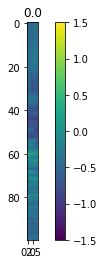

date:180413, rec:001, time:712.0


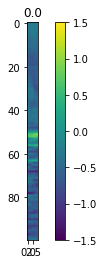

date:180323, rec:004, time:2965.0


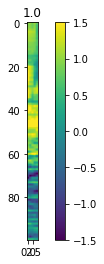

date:180325, rec:001, time:1777.0


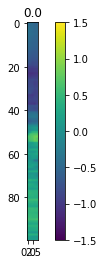

date:180327, rec:007, time:3427.0


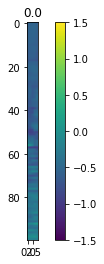

date:180410, rec:006, time:6089.0


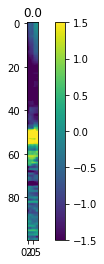

date:180413, rec:003, time:1780.0


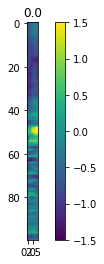

date:180412, rec:006, time:5175.0


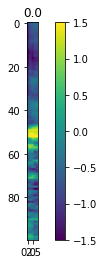

date:180413, rec:002, time:6488.0


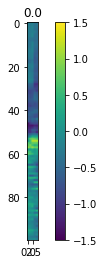

date:180411, rec:006, time:6961.0


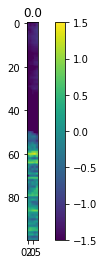

date:180325, rec:007, time:3113.0


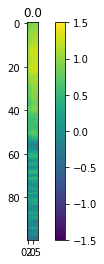

date:180323, rec:007, time:4824.0


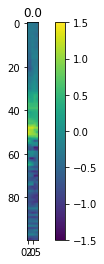

date:180324, rec:008, time:2625.0


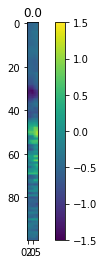

date:180409, rec:006, time:4770.0


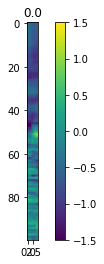

date:180325, rec:001, time:1882.0


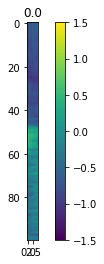

date:180401, rec:001, time:7090.0


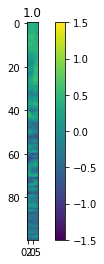

date:180413, rec:001, time:1472.0


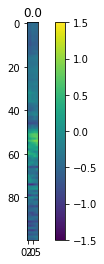

date:180325, rec:007, time:5820.0


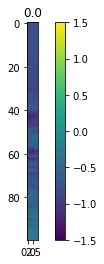

date:180411, rec:004, time:3760.0


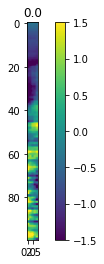

date:180323, rec:001, time:882.0


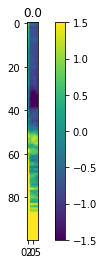

date:180325, rec:009, time:52.0


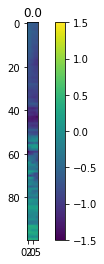

date:180327, rec:007, time:5878.0


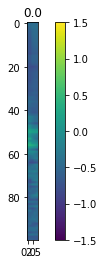

date:180413, rec:002, time:5888.0


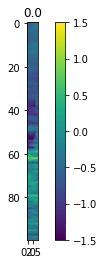

date:180414, rec:001, time:3619.0


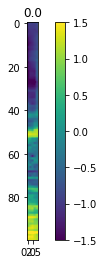

date:180325, rec:001, time:2332.0


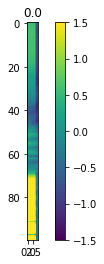

date:180413, rec:003, time:212.0


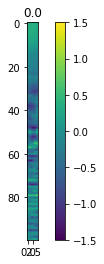

date:180409, rec:006, time:3112.0


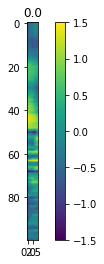

date:180323, rec:007, time:1921.0


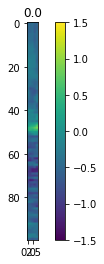

date:180413, rec:004, time:322.0


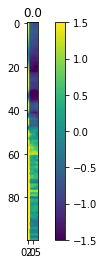

date:180327, rec:008, time:3809.0


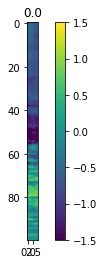

date:180327, rec:005, time:5420.0


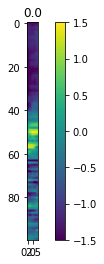

date:180413, rec:002, time:832.0


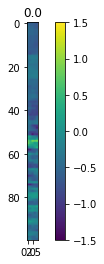

date:180327, rec:001, time:6769.0


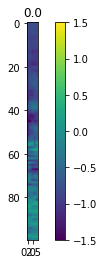

date:180322, rec:007, time:3251.0


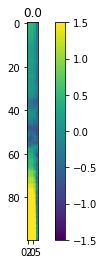

date:180322, rec:007, time:4397.0


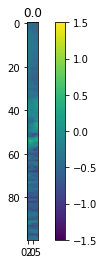

date:180327, rec:007, time:4212.0


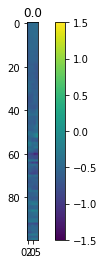

date:180413, rec:002, time:5713.0


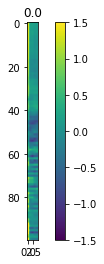

date:180324, rec:006, time:4687.0


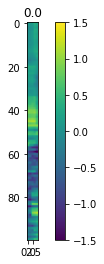

date:180414, rec:001, time:3574.0


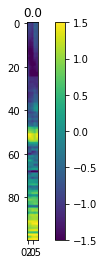

date:180327, rec:001, time:447.0


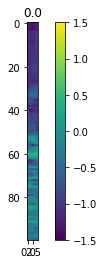

date:180327, rec:007, time:3907.0


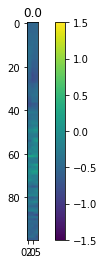

date:180325, rec:003, time:4485.0


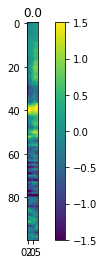

date:180411, rec:003, time:3815.0


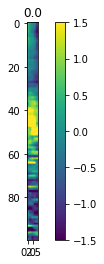

date:180325, rec:007, time:2673.0


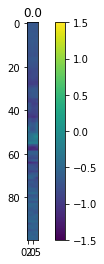

date:180325, rec:007, time:2718.0


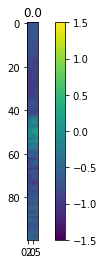

date:180327, rec:002, time:3698.0


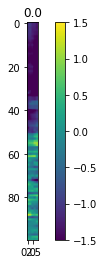

date:180413, rec:002, time:387.0


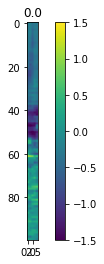

date:180325, rec:009, time:2212.0


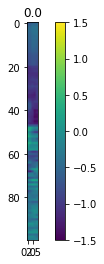

date:180327, rec:001, time:242.0


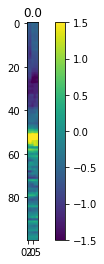

date:180325, rec:009, time:582.0


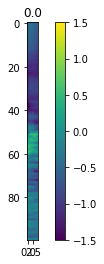

date:180411, rec:006, time:6406.0


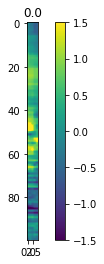

date:180411, rec:007, time:772.0


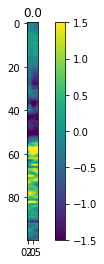

date:180412, rec:001, time:637.0


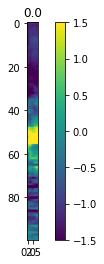

date:180409, rec:003, time:1473.0


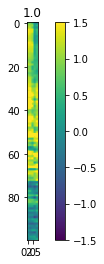

date:180325, rec:007, time:5080.0


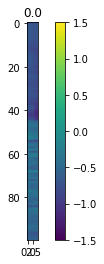

date:180414, rec:007, time:5870.0


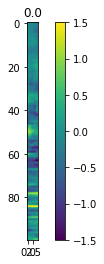

date:180327, rec:007, time:2722.0


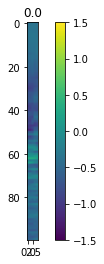

date:180325, rec:001, time:5389.0


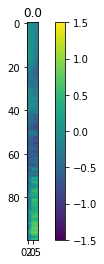

date:180411, rec:006, time:5654.0


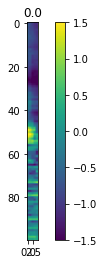

date:180325, rec:006, time:4972.0


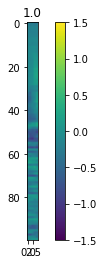

date:180327, rec:001, time:5857.0


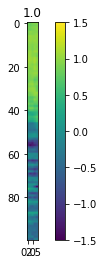

date:180327, rec:008, time:5710.0


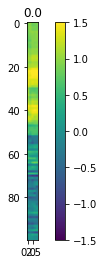

date:180325, rec:007, time:6525.0


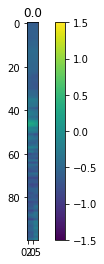

date:180324, rec:008, time:3360.0


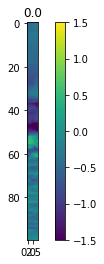

date:180413, rec:003, time:7023.0


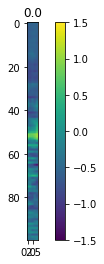

date:180413, rec:003, time:4955.0


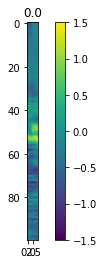

date:180413, rec:002, time:4613.0


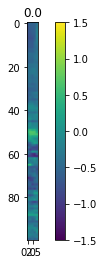

date:180327, rec:007, time:6218.0


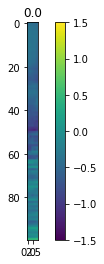

In [6]:
# movement labelled 0; non-movement labelled 1
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader):
    for i in range(128):
        print('date:{}, rec:{}, time:{}'.format(date[i], rec[i], time[i]))
        data_sub = data[i][0]
        plt.imshow(data_sub)
        plt.clim(-1.5, 1.5)
        plt.colorbar()
        plt.title(label[i][0].numpy())
        plt.show()
    break

In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

tol = 0.01
learning_rate = 0.001
num_epochs = 51
l2 = 0
alpha = 0
CH = 'all'

model = LogReg().to(device)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

cuda


In [8]:
epochs = []
training_losses = []
training_acc = []
val_losses = []
validation_acc = []

train_predictions = []
validation_predictions = []
train_preds_probs = []
validation_preds_probs = []
train_labels = []
validation_labels = []

for epoch in range(num_epochs):
    avg_train_loss, train_acc, train_preds, train_preds_probs, train_labs = train(model, criterion, optimizer, train_loader, epoch, alpha=alpha)
    print('Train loss for epoch {}: {}'.format(epoch, avg_train_loss))
    val_loss, val_acc, val_preds, val_preds_probs, val_labels = test(model, criterion, optimizer, val_loader)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            print(epoch)
            path =model_saving_path
            torch.save(model.state_dict(), '{}/lr_CH{}_reg{}_alpha{}_epoch{}.pt'.format(path, CH, l2, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(avg_train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    train_predictions.append(train_preds)
    train_labels.append(train_labs)
    train_preds_probs.append(train_preds_probs)
    validation_predictions.append(val_preds)
    validation_labels.append(val_labels)
    validation_preds_probs.append(val_preds_probs)
    
    if avg_train_loss < tol:
        break

Train loss for epoch 0: 1.5529038906097412
Val loss for epoch 0: 0.3010830879211426
Train loss for epoch 1: 0.3032781779766083
Val loss for epoch 1: 0.3669080138206482
Train loss for epoch 2: 0.30951356887817383
Val loss for epoch 2: 0.5238766074180603
Train loss for epoch 3: 0.27823442220687866
Val loss for epoch 3: 0.302554726600647
Train loss for epoch 4: 0.23699124157428741
Val loss for epoch 4: 0.2334107905626297
4
Train loss for epoch 5: 0.2119026780128479
Val loss for epoch 5: 0.2517518103122711
Train loss for epoch 6: 0.20303601026535034
Val loss for epoch 6: 0.3590237498283386
Train loss for epoch 7: 0.20294851064682007
Val loss for epoch 7: 0.3058997392654419
Train loss for epoch 8: 0.18957994878292084
Val loss for epoch 8: 0.3150399625301361
Train loss for epoch 9: 0.19094394147396088
Val loss for epoch 9: 0.29629555344581604
Train loss for epoch 10: 0.1883181780576706
Val loss for epoch 10: 0.46556341648101807
Train loss for epoch 11: 0.16456374526023865
Val loss for epoch 

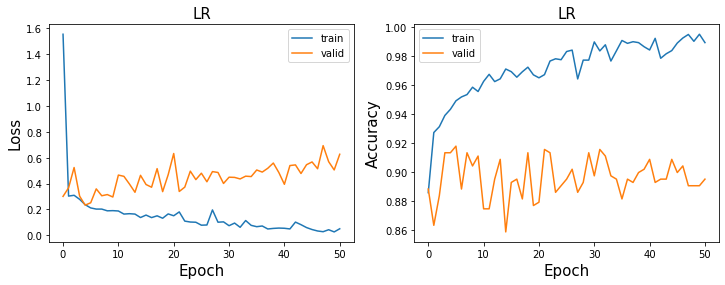

In [9]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title("LR", fontsize = 15)
plt.plot(training_losses[:51],linewidth = 1.5,label = 'train')
plt.plot(val_losses[:51],linewidth = 1.5,label = 'valid')
plt.xlabel("Epoch",fontsize = 15)
plt.ylabel("Loss", fontsize = 15)
plt.legend()
plt.subplot(1,2,2)
plt.title("LR", fontsize = 15)
plt.plot(training_acc[:51],linewidth = 1.5,label = 'train')
plt.plot(validation_acc[:51],linewidth = 1.5,label = 'valid')
plt.xlabel("Epoch",fontsize = 15)
plt.ylabel("Accuracy", fontsize = 15)
plt.legend()
plt.show()

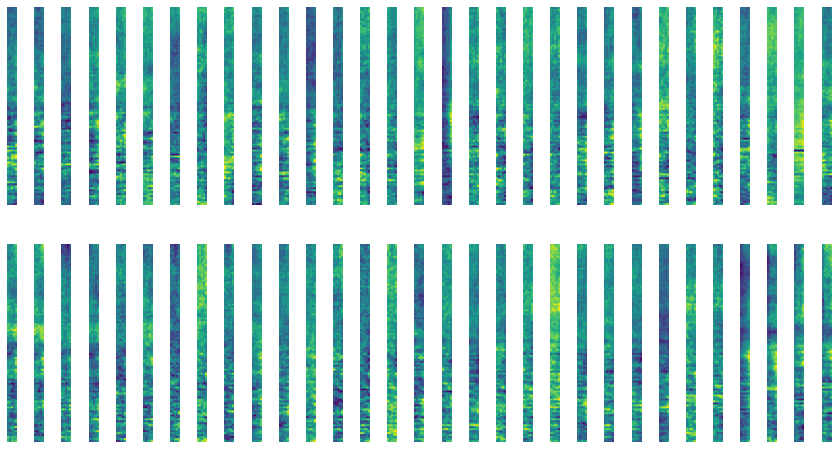

In [11]:
model = LogReg().to(device)
path = model_saving_path
epoch_num = 4
model.load_state_dict(torch.load('{}/lr_CH{}_reg{}_alpha{}_epoch{}.pt'.format(path, CH, l2, alpha,epoch_num)))
weights = model.linear.weight.view(62, 100, timewindow)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()

In [12]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_0 = test(model, criterion, optimizer, test_loader, mode='test')
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.3514707386493683 accuracy:0.9199895068205667


In [13]:
np.mean(np.concatenate(test_labels))

0.035152152

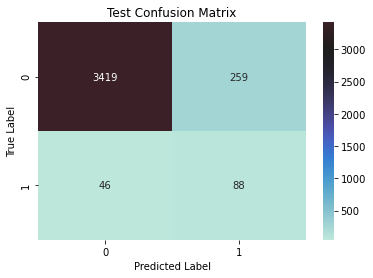

In [14]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=3000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180330, rec:001, time:001, label:1.0
Original data 62 CH


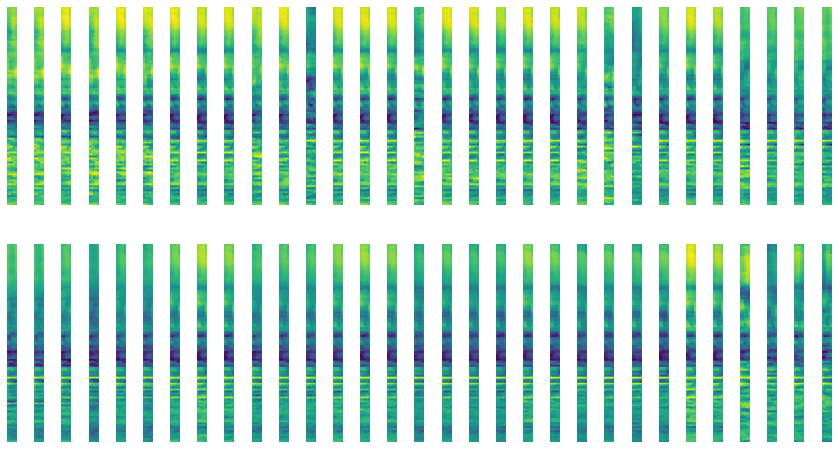

In [15]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_0[0][0], cases_wrong_0[0][1], cases_wrong_0[0][1], cases_wrong_0[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_0[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()

In [16]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

tol = 0.01
learning_rate = 0.001
num_epochs = 51
l2 = 0.1
alpha = 0
CH = 'all'

model = LogReg().to(device)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate, weight_decay=l2)

cuda


In [18]:
epochs = []
training_losses = []
training_acc = []
val_losses = []
validation_acc = []

train_predictions = []
validation_predictions = []
train_preds_probs = []
validation_preds_probs = []
train_labels = []
validation_labels = []

for epoch in range(num_epochs):
    avg_train_loss, train_acc, train_preds, train_preds_probs, train_labs = train(model, criterion, optimizer, train_loader, epoch, alpha=alpha)
    print('Train loss for epoch {}: {}'.format(epoch, avg_train_loss))
    val_loss, val_acc, val_preds, val_preds_probs, val_labels = test(model, criterion, optimizer, val_loader)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            print(epoch)
            path = model_saving_path
            torch.save(model.state_dict(), '{}/lr_CH{}_reg{}_alpha{}_epoch{}.pt'.format(path, CH, l2, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(avg_train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    train_predictions.append(train_preds)
    train_labels.append(train_labs)
    train_preds_probs.append(train_preds_probs)
    validation_predictions.append(val_preds)
    validation_labels.append(val_labels)
    validation_preds_probs.append(val_preds_probs)
    
    if avg_train_loss < tol:
        break

Train loss for epoch 0: 0.2759051024913788
Val loss for epoch 0: 0.32446393370628357
Train loss for epoch 1: 0.25257694721221924
Val loss for epoch 1: 0.23765778541564941
1
Train loss for epoch 2: 0.28893113136291504
Val loss for epoch 2: 0.2875865399837494
Train loss for epoch 3: 0.2729201018810272
Val loss for epoch 3: 0.5070205926895142
Train loss for epoch 4: 0.2939833998680115
Val loss for epoch 4: 0.2641329765319824
Train loss for epoch 5: 0.2517569065093994
Val loss for epoch 5: 0.38073623180389404
Train loss for epoch 6: 0.23309259116649628
Val loss for epoch 6: 0.22196397185325623
6
Train loss for epoch 7: 0.2221362292766571
Val loss for epoch 7: 0.3024269938468933
Train loss for epoch 8: 0.2792186439037323
Val loss for epoch 8: 0.28054079413414
Train loss for epoch 9: 0.23272296786308289
Val loss for epoch 9: 0.2870497405529022
Train loss for epoch 10: 0.3044126331806183
Val loss for epoch 10: 0.21678903698921204
10
Train loss for epoch 11: 0.22280578315258026
Val loss for ep

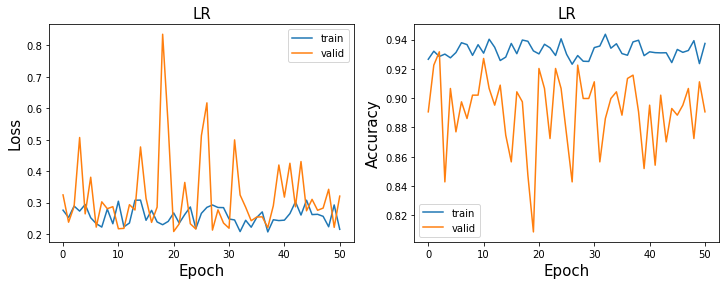

In [19]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title("LR", fontsize = 15)
plt.plot(training_losses[:51],linewidth = 1.5,label = 'train')
plt.plot(val_losses[:51],linewidth = 1.5,label = 'valid')
plt.xlabel("Epoch",fontsize = 15)
plt.ylabel("Loss", fontsize = 15)
plt.legend()
plt.subplot(1,2,2)
plt.title("LR", fontsize = 15)
plt.plot(training_acc[:51],linewidth = 1.5,label = 'train')
plt.plot(validation_acc[:51],linewidth = 1.5,label = 'valid')
plt.xlabel("Epoch",fontsize = 15)
plt.ylabel("Accuracy", fontsize = 15)
plt.legend()
plt.show()

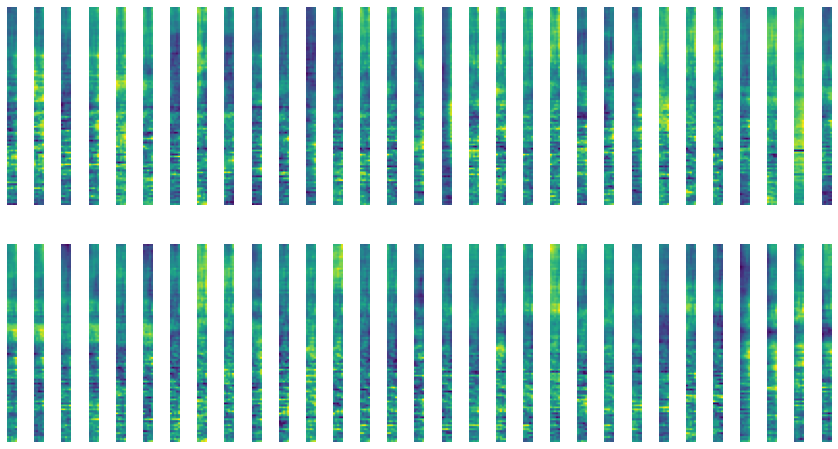

In [21]:
model = LogReg().to(device)
path = model_saving_path
epoch = 20
model.load_state_dict(torch.load('{}/lr_CH{}_reg{}_alpha{}_epoch{}.pt'.format(path, CH, l2, alpha, epoch)))
weights = model.linear.weight.view(62, 100, timewindow)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()

In [22]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_1 = test(model, criterion, optimizer, test_loader, mode='test')
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.29485929012298584 accuracy:0.9512067156348374


In [23]:
np.mean(np.concatenate(test_labels))

0.035152152

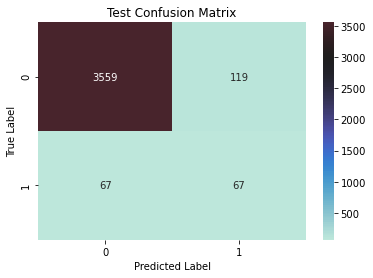

In [24]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=3000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180330, rec:001, time:001, label:1.0
Original data 62 CH


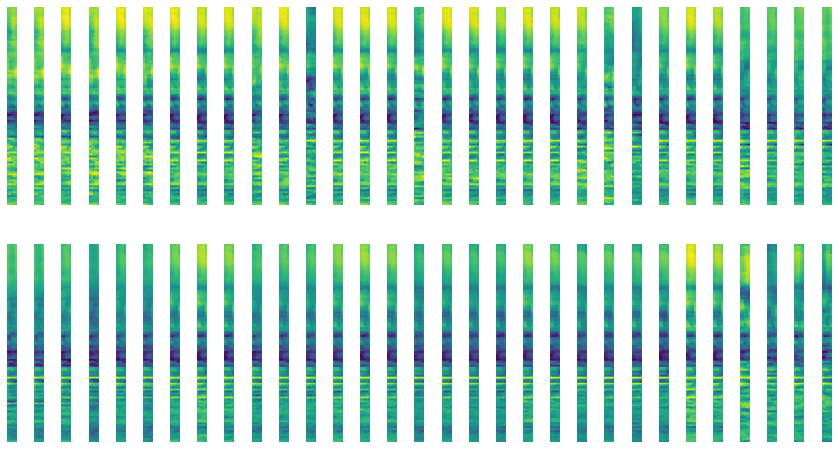

In [25]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][1], cases_wrong_1[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_1[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()

In [32]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

tol = 0.01
learning_rate = 0.001
num_epochs = 51
l2 = 0
alpha = 0.1
CH = 'all'

model = LogReg().to(device)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

cuda


In [30]:
epochs = []
training_losses = []
training_acc = []
val_losses = []
validation_acc = []

train_predictions = []
validation_predictions = []
train_preds_probs = []
validation_preds_probs = []
train_labels = []
validation_labels = []


for epoch in range(num_epochs):
    avg_train_loss, train_acc, train_preds, train_preds_probs, train_labs = train(model, criterion, optimizer, train_loader, epoch, alpha=alpha)
    print('Train loss for epoch {}: {}'.format(epoch, avg_train_loss))
    val_loss, val_acc, val_preds, val_preds_probs, val_labels = test(model, criterion, optimizer, val_loader)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            print(epoch)
            path = model_saving_path
            torch.save(model.state_dict(), '{}/lr_CH{}_reg{}_alpha{}_epoch{}.pt'.format(path, CH, l2, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(avg_train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    train_predictions.append(train_preds)
    train_labels.append(train_labs)
    train_preds_probs.append(train_preds_probs)
    validation_predictions.append(val_preds)
    validation_labels.append(val_labels)
    validation_preds_probs.append(val_preds_probs)
    
    if avg_train_loss < tol:
        break

Train loss for epoch 0: 1.8796310424804688
Val loss for epoch 0: 0.25251010060310364
Train loss for epoch 1: 0.4249599575996399
Val loss for epoch 1: 0.2952093183994293
Train loss for epoch 2: 0.37566497921943665
Val loss for epoch 2: 0.294025719165802
Train loss for epoch 3: 0.3353710174560547
Val loss for epoch 3: 0.42966631054878235
Train loss for epoch 4: 0.3331996202468872
Val loss for epoch 4: 0.3082691729068756
Train loss for epoch 5: 0.28489094972610474
Val loss for epoch 5: 0.2961542308330536
Train loss for epoch 6: 0.32621482014656067
Val loss for epoch 6: 0.294015109539032
Train loss for epoch 7: 0.3344308137893677
Val loss for epoch 7: 0.21797505021095276
7
Train loss for epoch 8: 0.2881428897380829
Val loss for epoch 8: 0.4169420599937439
Train loss for epoch 9: 0.2779354155063629
Val loss for epoch 9: 0.26351094245910645
Train loss for epoch 10: 0.3140234053134918
Val loss for epoch 10: 0.32663896679878235
Train loss for epoch 11: 0.3011954426765442
Val loss for epoch 11:

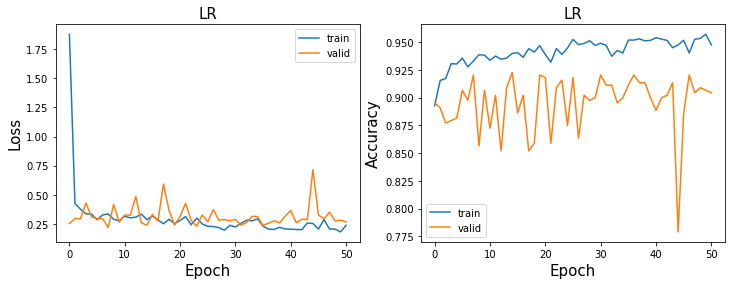

In [31]:
plt.figure(figsize=(12,4)) # upsample
plt.subplot(1,2,1)
plt.title("LR", fontsize = 15)
plt.plot(training_losses[:51],linewidth = 1.5,label = 'train')
plt.plot(val_losses[:51],linewidth = 1.5,label = 'valid')
plt.xlabel("Epoch",fontsize = 15)
plt.ylabel("Loss", fontsize = 15)
plt.legend()
plt.subplot(1,2,2)
plt.title("LR", fontsize = 15)
plt.plot(training_acc[:51],linewidth = 1.5,label = 'train')
plt.plot(validation_acc[:51],linewidth = 1.5,label = 'valid')
plt.xlabel("Epoch",fontsize = 15)
plt.ylabel("Accuracy", fontsize = 15)
plt.legend()
plt.show()

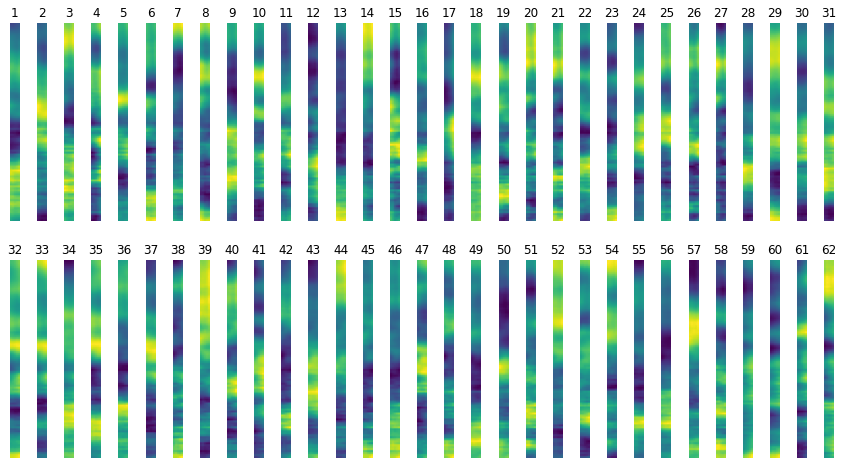

In [33]:
model = LogReg().to(device)
path = model_saving_path
epoch = 18
model.load_state_dict(torch.load('{}/lr_CH{}_reg{}_alpha{}_epoch{}.pt'.format(path, CH, l2, alpha,epoch)))
weights = model.linear.weight.view(62, 100, timewindow)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(i+1))
    # plt.clim(-0.03, 0.03)
plt.show()

In [34]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_2 = test(model, criterion, optimizer, test_loader, mode='test')
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

test loss:0.2879807651042938 accuracy:0.9081846799580273


In [35]:
np.mean(np.concatenate(test_labels))

0.035152152

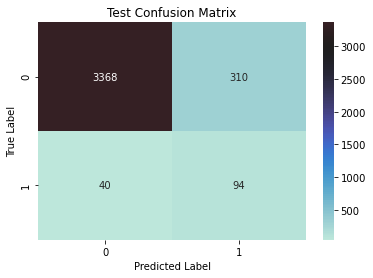

In [36]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=3000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

date:180331, rec:001, time:001, label:1.0
Original data 62 CH


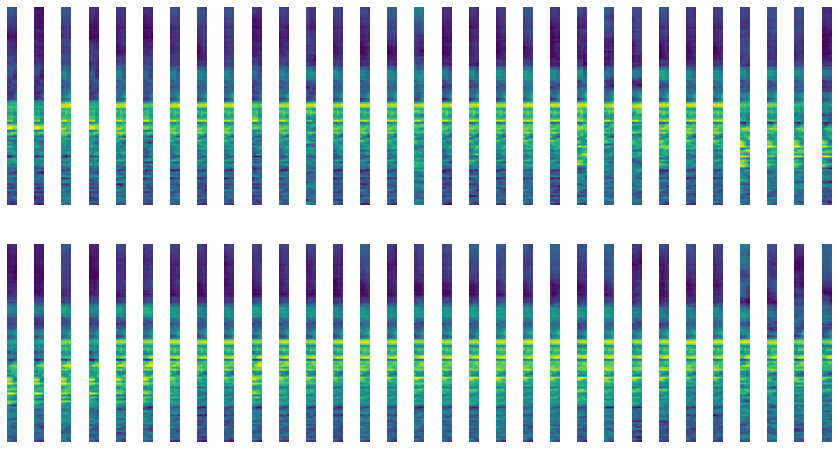

In [37]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_2[0][0], cases_wrong_2[0][1], cases_wrong_2[0][1], cases_wrong_2[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_2[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()